In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [68]:
df = pd.read_csv("british_csv/with_bbox.csv", index_col = 0)
print(df.head())

           spikelets_num  H1S1V1  H1S2V1  H1S3V1  H2S1V1  H2S2V1  H2S3V1  \
name                                                                       
Spike_450             10    7209  119505  438613      63     367       0   
Spike_196             12  907452   54465  459671    1891     861      53   
Spike_62              11  559493    8002  468116     607     652       6   
Spike_793             12    6178    4748  584431      94     896      28   
Spike_378             10  600469   19612  459966     140     717      37   

           H3S1V1  H3S2V1  H3S3V1  ...  H2S1V3  H2S2V3  H2S3V3  H3S1V3  \
name                               ...                                   
Spike_450      63   21647       9  ...       0       0       0       0   
Spike_196   25979   19772      81  ...       0       0       0       0   
Spike_62     9545    8598       4  ...       2       0       0       0   
Spike_793     196   26395      17  ...       0       0       0       0   
Spike_378    4633   199

In [69]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

pca = PCA()
pca.fit(df_std)
variance_ratio = pca.explained_variance_ratio_
print(variance_ratio)

[3.75564879e-01 1.46483467e-01 1.30805274e-01 5.94983106e-02
 5.36352383e-02 4.30602392e-02 2.91083284e-02 2.77695331e-02
 2.37272036e-02 2.22729116e-02 1.84963508e-02 1.29137199e-02
 1.19892150e-02 8.73519291e-03 7.85249007e-03 5.07181928e-03
 4.76323812e-03 4.15089617e-03 3.39457876e-03 3.01165462e-03
 2.33064770e-03 1.81501336e-03 1.20972862e-03 9.62108503e-04
 8.12233854e-04 3.38877795e-04 1.92845294e-04 3.36359418e-05
 3.69148797e-07 7.40671126e-32 1.82090152e-33 1.82090152e-33]


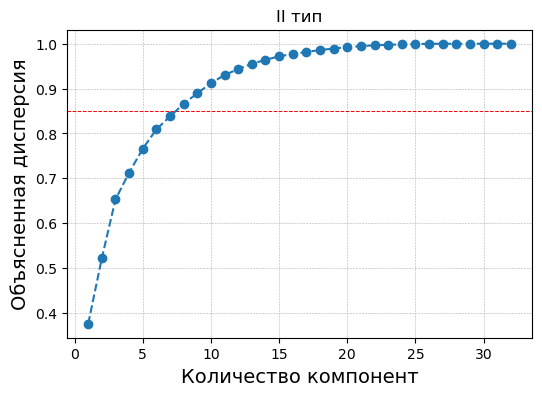

In [70]:
fig = plt.figure(figsize = (6, 4))
plt.grid(linestyle='--', lw=0.4)
plt.axhline(y=0.85, color='red', linestyle='--', lw=0.7)
variance_plot_points = plt.plot(range(1, len(variance_ratio) + 1),
                                variance_ratio.cumsum(),
                                marker = "o",
                                linestyle = "--")
plt.xlabel("Количество компонент", size=14)
plt.ylabel("Объясненная дисперсия", size=14)
plt.title("II тип")
plt.show()
fig.savefig('II_type.jpg', dpi=300)

In [71]:
chosen_components = len([i for i in variance_plot_points[0].get_data()[1] if i <= 0.85])
print(chosen_components)

7


In [72]:
pca = PCA(n_components = chosen_components)
pca.fit(df_std)
pca.transform(df_std)

pca_scores = pca.transform(df_std)

In [73]:
cluster_num_for_testing = 20
wcss = []
for i in range(1, cluster_num_for_testing + 1):
    kmeans_pca = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    kmeans_pca.fit(pca_scores)
    wcss.append(kmeans_pca.inertia_)

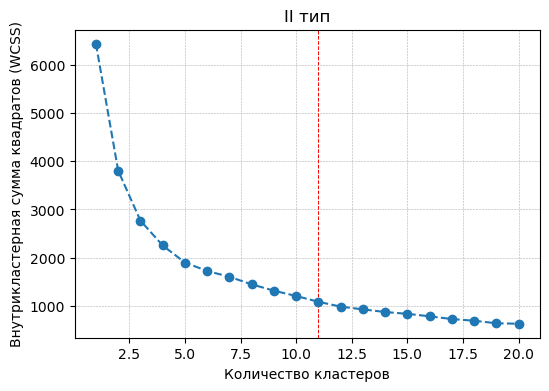

In [74]:
fig = plt.figure(figsize = (6, 4))
plt.axvline(x=11, color='red', linestyle='--', lw=0.7)
plt.grid(linestyle='--', lw=0.4)
cluster_plot_points = plt.plot(range(1, cluster_num_for_testing + 1),
                               wcss,
                               marker = "o",
                               linestyle = "--")
plt.xlabel("Количество кластеров")
plt.ylabel("Внутрикластерная сумма квадратов (WCSS)")
plt.title("II тип")
plt.show()
fig.savefig('II_cluster.jpg', dpi=300)

In [75]:
x = cluster_plot_points[0].get_data()[0]
y = cluster_plot_points[0].get_data()[1]
x
y

array([6437.0360525 , 3805.12190309, 2768.6461221 , 2252.44147748,
       1898.97244928, 1723.37644883, 1602.79077503, 1446.56143041,
       1315.06796754, 1204.69573879, 1084.78714401,  984.12665339,
        927.29518411,  872.35325323,  834.48030592,  783.26522164,
        726.30305312,  692.07363631,  639.15744414,  629.64197755])

In [76]:
tangents = []

for i in range(len(x) - 1):
    tangents.append(abs(y[i] - y[i+1]) / abs(x[i] - x[i+1]))
difference = [abs(tangents[i] - tangents[i+1]) for i in range(len(tangents) - 1)]

In [77]:
chosen_clusters = 0
for i in difference:
    if i < 40:
        break
    chosen_clusters += 1
chosen_clusters += 1

chosen_clusters = 11
print(chosen_clusters)

11


In [78]:
kmeans_pca = KMeans(n_clusters = chosen_clusters, init = "k-means++", random_state = 42)
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=11, random_state=42)

In [79]:
df_pca_kmeans = pd.concat([df.reset_index(drop = True),
                          pd.DataFrame(pca_scores)],
                          axis = 1)
component_names = [f"{i} компонента" for i in range(1, chosen_components + 1)]
df_pca_kmeans.columns.values[-chosen_components:] = component_names
df_pca_kmeans["Cluster"] = kmeans_pca.labels_
print(df_pca_kmeans.head())

   spikelets_num  H1S1V1  H1S2V1  H1S3V1  H2S1V1  H2S2V1  H2S3V1  H3S1V1  \
0             10    7209  119505  438613      63     367       0      63   
1             12  907452   54465  459671    1891     861      53   25979   
2             11  559493    8002  468116     607     652       6    9545   
3             12    6178    4748  584431      94     896      28     196   
4             10  600469   19612  459966     140     717      37    4633   

   H3S2V1  H3S3V1  ...  bbox_height  spike_perimeter  1 компонента  \
0   21647       9  ...    63.175668       145.648700     -0.661120   
1   19772      81  ...   100.803033       284.081248      2.832000   
2    8598       4  ...    63.081688       151.442246      2.675477   
3   26395      17  ...    87.327351       218.163590     -4.510666   
4   19921      35  ...    74.578797       232.548253      1.849230   

   2 компонента  3 компонента  4 компонента  5 компонента  6 компонента  \
0      5.152433     -3.085947      0.761912    

In [80]:
possible_names = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]
map_cluster_on_names = {}
for i in range(chosen_clusters):
    map_cluster_on_names[i] = possible_names[i]
df_pca_kmeans["Cluster Name"] = df_pca_kmeans["Cluster"].map(map_cluster_on_names)
print(df_pca_kmeans)

     spikelets_num  H1S1V1  H1S2V1  H1S3V1  H2S1V1  H2S2V1  H2S3V1  H3S1V1  \
0               10    7209  119505  438613      63     367       0      63   
1               12  907452   54465  459671    1891     861      53   25979   
2               11  559493    8002  468116     607     652       6    9545   
3               12    6178    4748  584431      94     896      28     196   
4               10  600469   19612  459966     140     717      37    4633   
..             ...     ...     ...     ...     ...     ...     ...     ...   
251             13  447159    7751  457691     338     605       3    4864   
252             12  757297   53352  480204     111     656       6    2865   
253              9   13603    8874  599552     136     966      40     244   
254             14  259893    5419  446524     630     491       0   13677   
255             10   13341    4836  584256     158     860      74     212   

     H3S2V1  H3S3V1  ...  spike_perimeter  1 компонента  2 комп

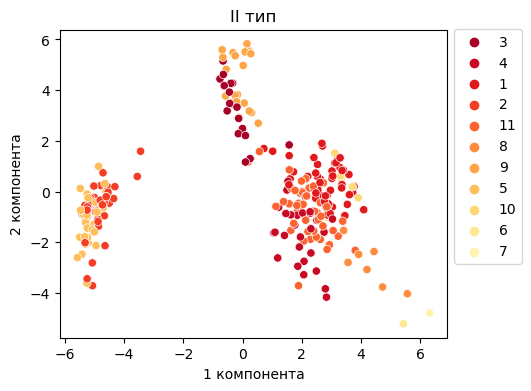

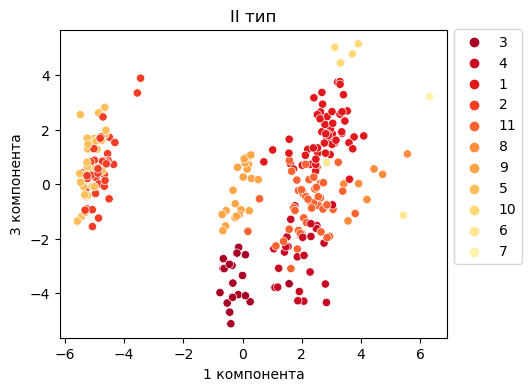

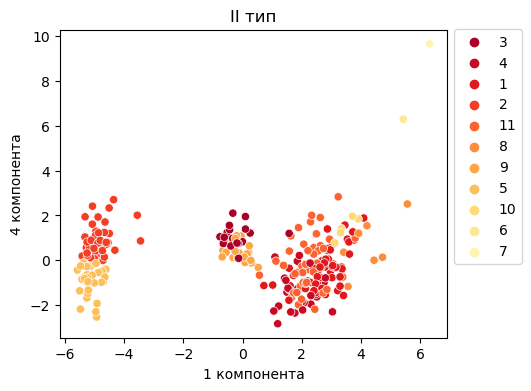

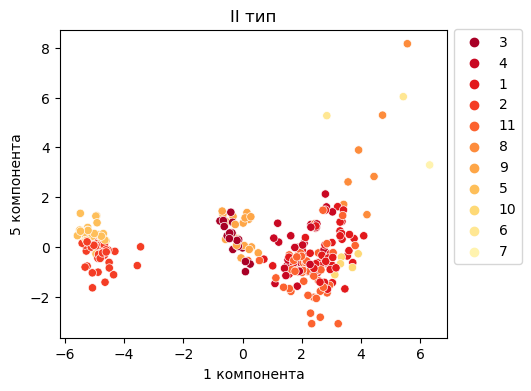

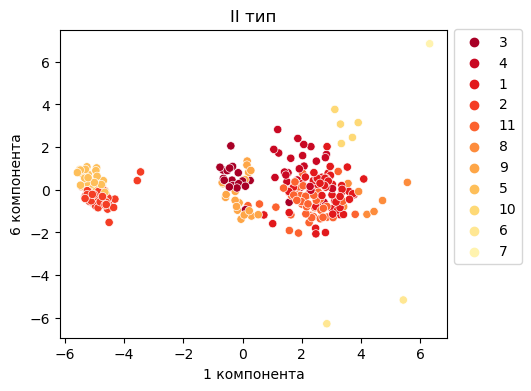

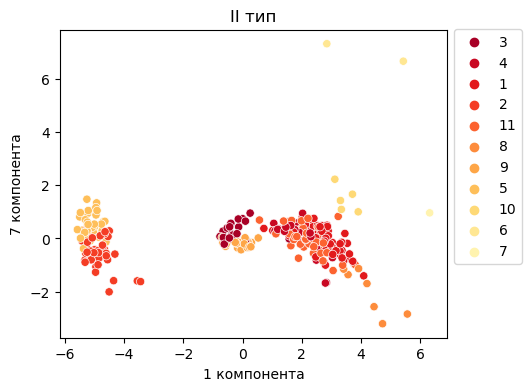

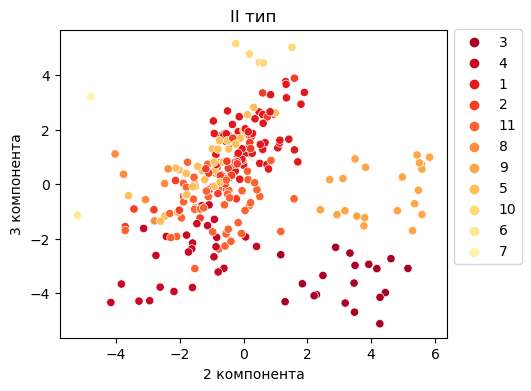

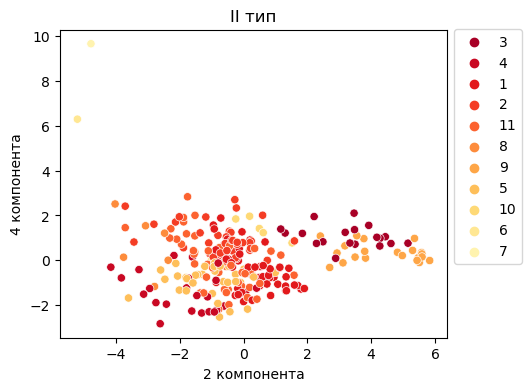

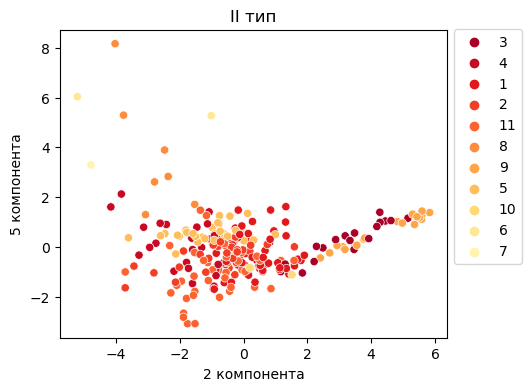

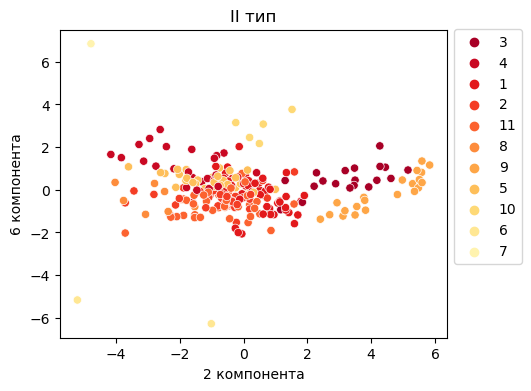

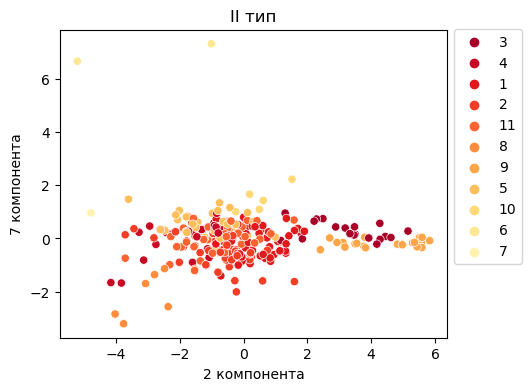

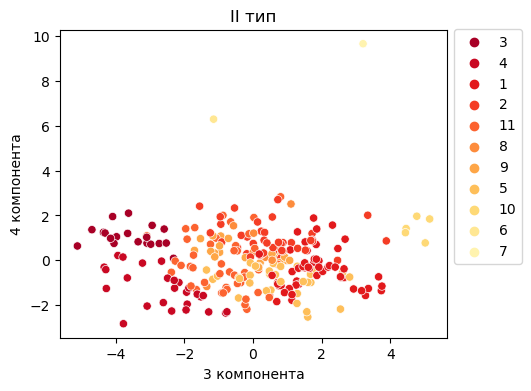

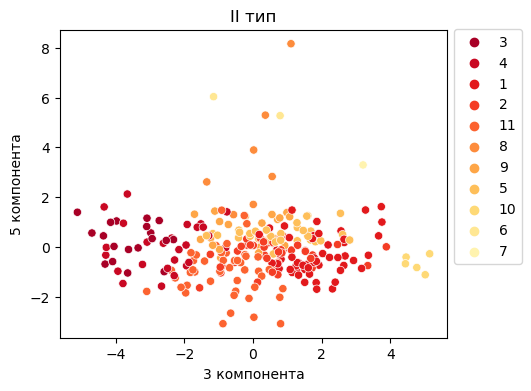

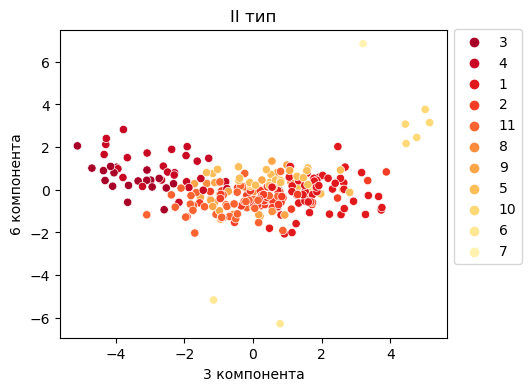

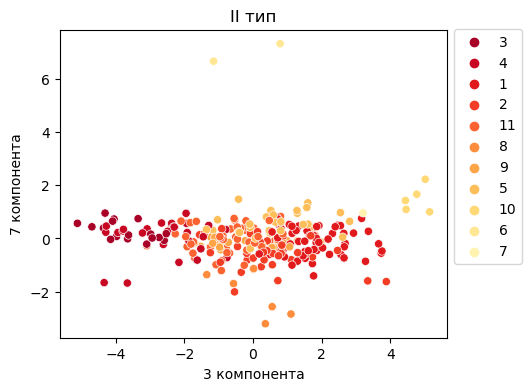

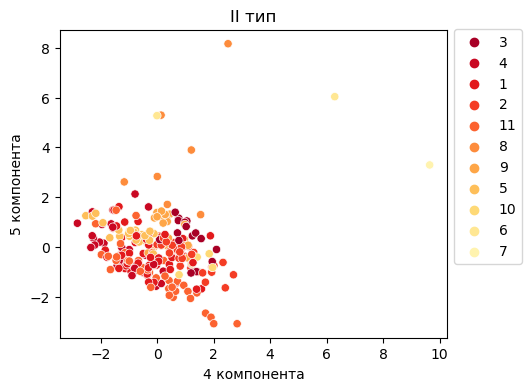

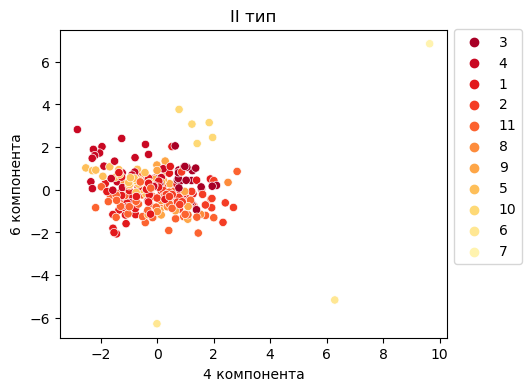

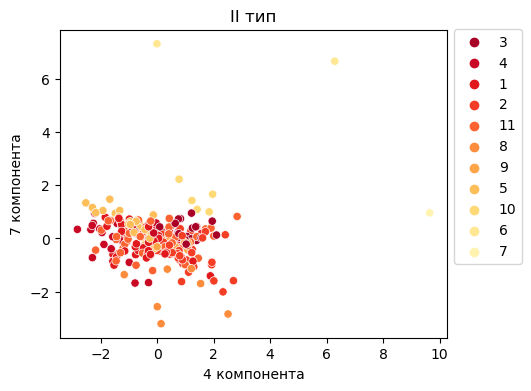

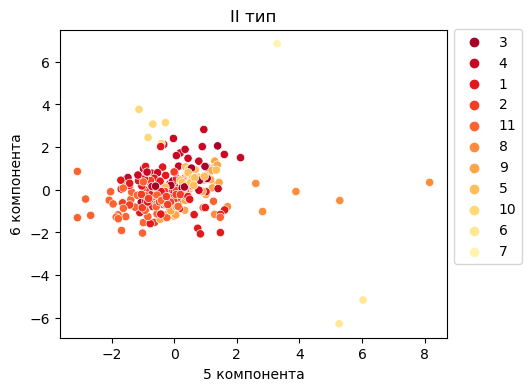

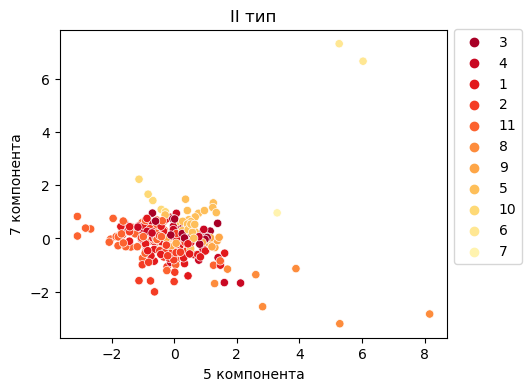

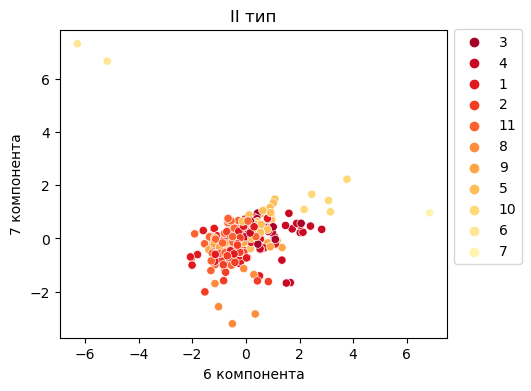

In [17]:
for first in component_names:
    component_names_slice = component_names[component_names.index(first) + 1:]
    for second in component_names_slice:
        fig = plt.figure(figsize = (5, 4))
        sns.scatterplot(x=df_pca_kmeans[first], 
                        y=df_pca_kmeans[second], 
                        hue = df_pca_kmeans["Cluster Name"], 
                        palette = reversed(sns.color_palette("YlOrRd", n_colors=chosen_clusters)))
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.62))
        plt.title("II тип")
        plt.show()
        fig.savefig(f"british_plots/{first}_{second}.png", bbox_inches='tight', dpi=300)

In [16]:
new_df = df
new_df.reset_index(inplace=True)
print(new_df)

          name  spikelets_num  H1S1V1  H1S2V1  H1S3V1  H2S1V1  H2S2V1  H2S3V1  \
0    Spike_450             10    7209  119505  438613      63     367       0   
1    Spike_196             12  907452   54465  459671    1891     861      53   
2     Spike_62             11  559493    8002  468116     607     652       6   
3    Spike_793             12    6178    4748  584431      94     896      28   
4    Spike_378             10  600469   19612  459966     140     717      37   
..         ...            ...     ...     ...     ...     ...     ...     ...   
251   Spike_82             13  447159    7751  457691     338     605       3   
252   Spike_25             12  757297   53352  480204     111     656       6   
253  Spike_799              9   13603    8874  599552     136     966      40   
254   Spike_40             14  259893    5419  446524     630     491       0   
255  Spike_757             10   13341    4836  584256     158     860      74   

     H3S1V1  H3S2V1  ...  H

In [90]:
df_result = pd.concat([new_df["name"],df_pca_kmeans["Cluster"]], join = 'outer', axis = 1)
print(df_result)

df_result.to_csv("british_clusters.csv", index=False)

          name  Cluster
0    Spike_450        2
1    Spike_196        3
2     Spike_62        0
3    Spike_793        1
4    Spike_378       10
..         ...      ...
251   Spike_82        0
252   Spike_25       10
253  Spike_799        1
254   Spike_40        9
255  Spike_757        1

[256 rows x 2 columns]
